In [20]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import create_coherent_state
from core import time_evo
from core import time_evo_new
from core import time_evo_from_state
from core import load_param
from core import load_H_list
from core import load_result
from core import load_tlist
from core import operators
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from core import annihilation_operator
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.distribution_gif import prob_gif
from utils.distribution_gif import gif_distrib_H_s_int
from utils.distribution_gif import gif_distrib_system_first_eig
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.basic_functions import random_dephasing
from utils.basic_functions import get_state_probabilities
from utils.basic_functions import position
from utils.basic_functions import copy_cat
from utils.basic_functions import plot_einselection
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val_time
from utils.plot_hamiltonians import plot_hamiltonians

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.titlesize'] = 16             # Title font size
plt.rcParams['axes.titleweight'] = 'bold'       # Title font weight
plt.rcParams['axes.labelsize'] = 14             # X and Y label font size
plt.rcParams['axes.labelweight'] = 'bold'       # X and Y label font weight
#plt.rcParams['axes.grid'] = True                # Enable grid
#plt.rcParams['grid.alpha'] = 0.7                # Grid transparency
#plt.rcParams['grid.linestyle'] = '--'           # Grid line style
#plt.rcParams['grid.color'] = 'gray'             # Grid color

# Tick settings
plt.rcParams['xtick.labelsize'] = 12            # X tick label size
plt.rcParams['ytick.labelsize'] = 12            # Y tick label size
plt.rcParams['xtick.direction'] = 'in'          # X tick direction
plt.rcParams['ytick.direction'] = 'in'          # Y tick direction
plt.rcParams['xtick.major.size'] = 6            # X major tick size
plt.rcParams['ytick.major.size'] = 6            # Y major tick size

# Legend settings
plt.rcParams['legend.fontsize'] = 12            # Legend font size
plt.rcParams['legend.frameon'] = True           # Enable legend frame
plt.rcParams['legend.framealpha'] = 0.9         # Legend frame transparency
plt.rcParams['legend.loc'] = 'best'             # Legend location

# Line and marker settings
plt.rcParams['lines.linewidth'] = 2             # Line width
plt.rcParams['lines.markersize'] = 6            # Marker size

custom_colors = ['#1c4587', '#e6194B', '#2ca02c', '#d62728', '#9467bd', 
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)




<img src="outputs/temp/unitary_fund_logo.png" width="500"> <img src="outputs/temp/ACL.png" width="361">


# Decoherence

*The loss of fine tunning in phase relations, caused by interactions.*

<ul>
  <li>Important for quantum computing: quantum state preservation, scalability, quantum gate fidelity, maximizing cohrence times, hardwar consideration, quantum anealing... </li>
  <li>Important in the foundations for quantum mechanics: emergence of classicality (einselection), arrow of time, ...</li>
  <li>Still with many open questions: Exact mechanism of decoherence, reversibility and control, impact on fundamental limits (ie measurements precision) </li>
</ul>






<h1/>The ACL model<h1/>

The ACL model is model of **decoherence**, adapted from the **Caldeira-Leggett model**. It simplifies it by keeping the strict minimum to achieve decoherence while making it numerically practical. 
The ACL model, models a Hamiltonian, of the form 
$$H=\alpha_s H_{SHO}\otimes id_e+\beta X\otimes H_{int}+\alpha_e id_s\otimes H_{e}$$
in a Hilbert space composed of a system $\mathcal{S}$ and an environment $\mathcal{E}$. <br>

It is made of: A **truncated simple harmonic oscillator** (SHO), $H_s=H_{SHO}\otimes id_e$, with $H_{SHO}=\hat{a}^{\dagger}\hat{a}$. A **maximally scrambling environment** $H_e=id_s\otimes H_r$. An **interaction term** $H_I=X\otimes H^e_I$ and $X$ the position operator. This makes the interaction strenght dependant on the position.


The total Hamiltonian is constant during the whole time evolution, yet it can simulate aparent irreversibility, wavefunction branching, ...



<h1>Why the ACL?<h1>

<ul>
  <li>Reproduce the essential features of the CL model and more</li>
  <li>Numerical frendly model</li>
  <li>Allows for exploration outsie of the limits in which master equations are accurate with purely unitary quantum mechanics. (Phenomena outside of masters equatiosn reach: einselection, fluctuating equilibrium states, AoT and quantum thermodynamics...)</li>
  
</ul>


<h1>A very simple decoherence model<h1>

While capable of simulating the ACL model, we can already seea lot with an even simpler model
$$H=\alpha_s H_{SHO}\otimes id_e+\beta H_{SHO}\otimes H_{int}+\alpha_e id_s\otimes H_{e}$$

<h3>And an example of running a simulation<h3>

In [21]:
d1=10;d2=200;E_s=1; E_s2=0; E_int_s=0; E_int_e=1;E_int_s2=0.06;E_int_e2=0; E_e=1; E_e2=0;w=[0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0];envi=[0]; tmax= 10; ind_nb = 100;log=0
file_name="basic_decoherence"
result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log)

<h3>Loading results, relevant parameters and getting useful quantities calculated<h3>

In [22]:
d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log = load_param(file_name)
info = list(load_param(file_name))
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

eigen = eig(H_list)
s_list = compute_schmidt_states_all_time(result, ind_nb)
ss_list = s_list[0]
se_list= s_list[1]
sv_list = s_list[2]
s_full_list=s_list[3]

<h3>Einselection/Visualizing the collapse <h3>

/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


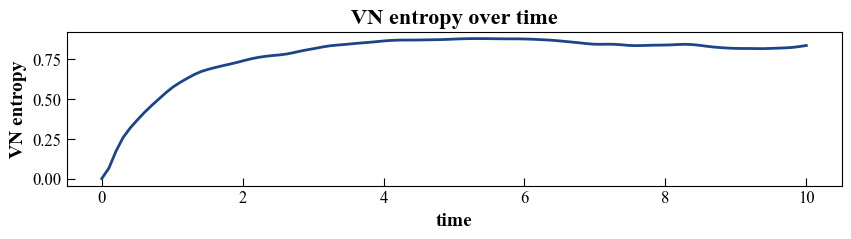

In [23]:
gif_path = collapse_gif(eigen, s_list, info)
display_gif(gif_path)
plot_VN(result,tlist)

<h1>A less simple decoherence model<h1>

$H=\alpha_s H_{SHO}\otimes \mathbb{1}+\beta X\otimes H_{int}+\alpha_e\mathbb{1}\otimes H_{e}$ 


<h3>The strong interaction limit.<h3>

$\alpha_i>>\beta$, position eigenstates are pointer states

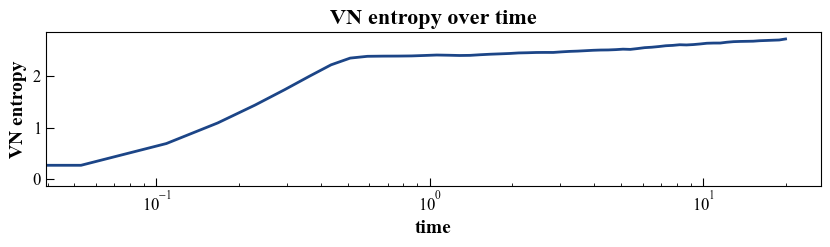

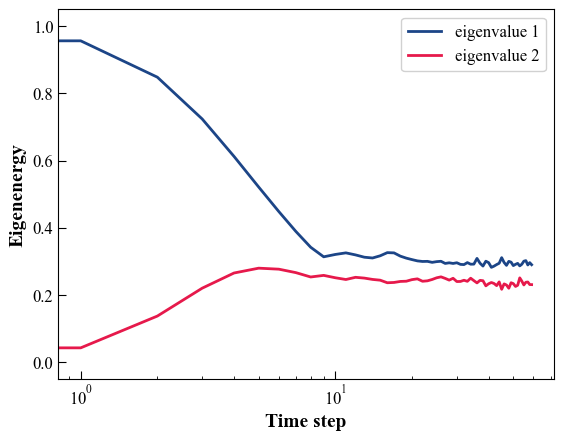

In [24]:
file_name = "strong_interaction_limit"
d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)
file_name=file_name+"second"
path=f'../outputs/gifs/rho_s_first_eig_distrib_in_H_int_s_gif_{file_name}.gif'

display_gif(path)

plot_VN(result,tlist,log)
plt.show()
plot_einselection(result,ind_nb,d1)

<h3>The weak interaction limit<h3>

$\alpha_i>>\beta$, SHO eingenstates are pointer states

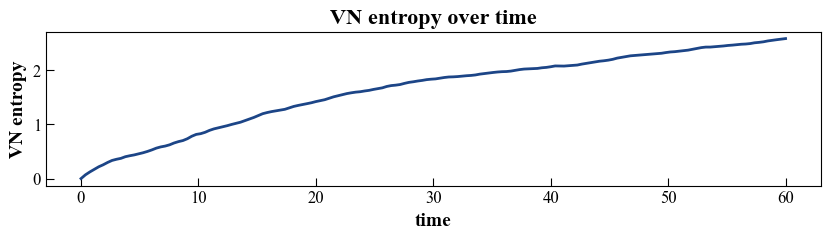

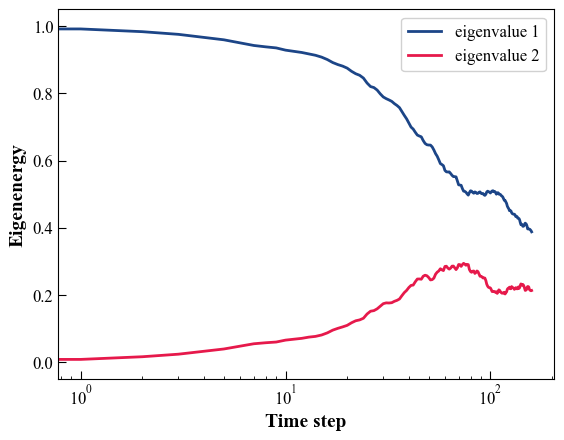

In [25]:
file_name = "weak_interaction_limit"
d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)
file_name=file_name+"second"
path=f'../outputs/gifs/rho_s_first_eig_distrib_in_H_int_s_gif_{file_name}.gif'

display_gif(path)

plot_VN(result,tlist,log)
plt.show()
plot_einselection(result,ind_nb,d1)

<h3>The intermediate regime<h3>

Where coherent states are pointer states. Harmonic oscillator behavior with a coherent state

In [26]:
path="../outputs/gifs/distrib_in_H_int_s_gif_coherent_state_notebook.gif"
display_gif(path)

<h3>Cat states + visible interference<h3>

In [27]:
path="../outputs/gifs/distrib_in_H_int_s_gif_coherent_state_superposition.gif"
display_gif(path)

<img src="outputs/temp/interference_superposition.jpg" width="1001">


<h3>Cat state and einselection<h3>
<h5>We plot the top 2 eigenstates of $\rho_s$<h5>

30


../outputs/gifs/rho_s_first_eig_distrib_in_H_int_s_gif_coherent_state_decoherence.gif


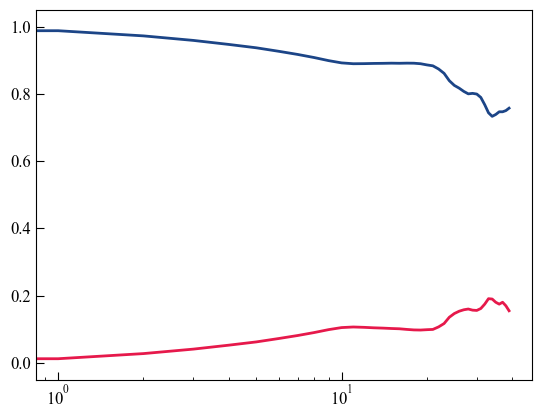

In [28]:
file_name = "coherent_state_decoherence"

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
print(d1)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

eigenenergies1_list=[]
eigenenergies2_list=[]
for i in range(ind_nb):
    rho_s=qt.ptrace(result.states[i], [0])
    eigenenergies, eigenstates = rho_s.eigenstates()
    eigenenergies1_list.append(eigenenergies[29])
    eigenenergies2_list.append(eigenenergies[28])

plt.plot(eigenenergies1_list)
plt.plot(eigenenergies2_list)
plt.xscale('log')


path = gif_distrib_system_first_eig(d1,H_list,result,ind_nb, file_name)
print(path)
display_gif(path)

Note the presence of **three regimes**, **decoherence**, **post decoherence**  and **dissipation**. 